# Netflix Original Content Insights

I created a dataset of notable Netflix TV and Film information to gather insights on which kind of content obtains the best ratings. Notable refers to productions that recieved more attention from subscibers/media coverage, and not necessarily meaning they were popular.

References: [Business Insider](https://www.businessinsider.com/best-netflix-original-shows-ranked-2017-11#79-disjointed-22-4), [Esquire](https://www.esquire.com/entertainment/movies/g26239130/best-netflix-original-movies/)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
netflix = pd.read_csv("Netflix Original Content Dataset.csv")

In [25]:
netflix.head()

,Title,Type,Year Released,Seasons,Main Actor,Genre,International,Animated,RT Critic Score,RT Audience Score,IMDb Rating,Rating,Viewership (Millions)
1,#realityhigh,Film,2017,NaN,Female,Comedy,no,no,40.0,53.0,5.2,TV-14,NaN
2,13TH,Film,2016,NaN,Both,Crime,no,no,97.0,91.0,8.2,TV-MA,NaN
3,1922,Film,2017,NaN,Male,Thriller,no,no,88.0,57.0,6.3,TV-MA,NaN
4,1983,TV,2018,1,Male,"Crime, Drama",yes,no,100.0,81.0,7.1,TV-MA,NaN
5,22 July,Film,2018,NaN,Both,"Drama, Thriller",no,no,79.0,69.0,6.7,R,NaN


In [4]:
#Set the first row to become the columns
netflix.columns = netflix.iloc[0]
netflix.drop(netflix.index[0], inplace=True)

In [26]:
netflix.head()

,Title,Type,Year Released,Seasons,Main Actor,Genre,International,Animated,RT Critic Score,RT Audience Score,IMDb Rating,Rating,Viewership (Millions)
1,#realityhigh,Film,2017,NaN,Female,Comedy,no,no,40.0,53.0,5.2,TV-14,NaN
2,13TH,Film,2016,NaN,Both,Crime,no,no,97.0,91.0,8.2,TV-MA,NaN
3,1922,Film,2017,NaN,Male,Thriller,no,no,88.0,57.0,6.3,TV-MA,NaN
4,1983,TV,2018,1,Male,"Crime, Drama",yes,no,100.0,81.0,7.1,TV-MA,NaN
5,22 July,Film,2018,NaN,Both,"Drama, Thriller",no,no,79.0,69.0,6.7,R,NaN


I'm not sure why, but the numerical values in the whole dataset turned out to be strings. It may have something to do with the fact that I created the dataset manually using excel and then converting it into a csv file. If anyone knows how to keep the numerical values as floats from the get go, please let me know.

In [6]:
#Changing all the numerical string values into floats
netflix['RT Critic Score'] = netflix['RT Critic Score'].astype(float)
netflix['RT Audience Score'] = netflix['RT Audience Score'].astype(float)
netflix['IMDb Rating'] = netflix['IMDb Rating'].astype(float)

## Rotten Tomatoes Critic vs. Audience Score 

A visualization of the relationship between Rotton Tomatoes' Critic Score and its' Audience Score. A hue of the gender of the main actor has also been applied.

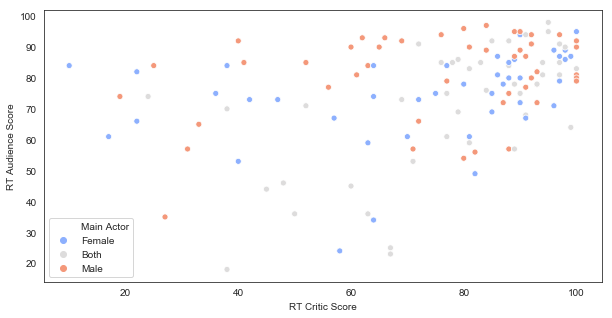

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='RT Critic Score', y='RT Audience Score', data=netflix, palette='coolwarm', hue='Main Actor')
sns.set_style('white')

There doesn't seem to be much of a pattern on the above plot, except that for the most part, if a TV or Film's Critic Score is high, it usually means its' Audience Score will be high as well. 
In some cases, there is a disconnect between critics and the audience as some content that earned a low critic score, recieved a high audience score.

## Visualization of Gender Data 

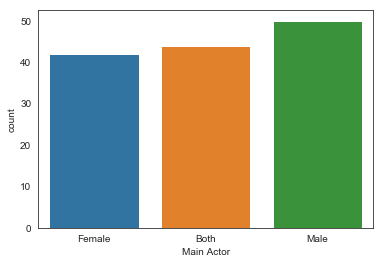

In [31]:
sns.countplot(data=netflix, x='Main Actor')

The plot above shows us that more male actors starred in Netflix's notable productions than females.

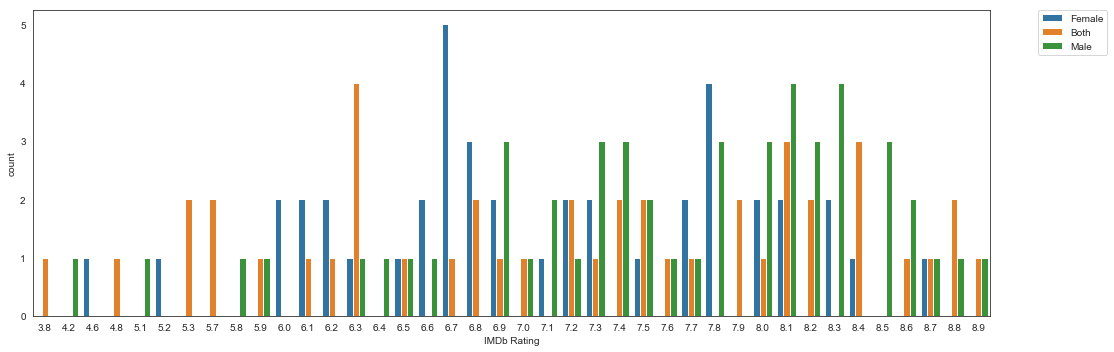

In [30]:
plt.figure(figsize=(14, 5))
sns.countplot(data=netflix, x='IMDb Rating', hue='Main Actor')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #relocate the legend

The above plot shows that on average, it was the content that featured a male actor, or both a male/female actor that got an IMDb rating above 8.0, while content solely featuring a female actor had overall lower ratings. 

Of course, this could be due to the content I added into the dataset from the references I used, and the fact that there were more entries in the dataset that featured a male actor (as can be seen in the previous count plot). More information on Netflix content is needed in order to visualize further trends.

## Parental Guideline Visualization 

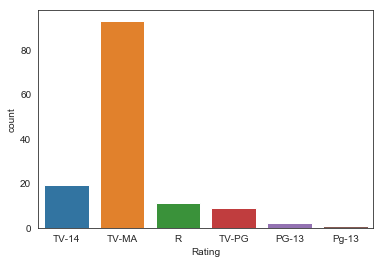

In [34]:
sns.countplot(data=netflix, x='Rating')

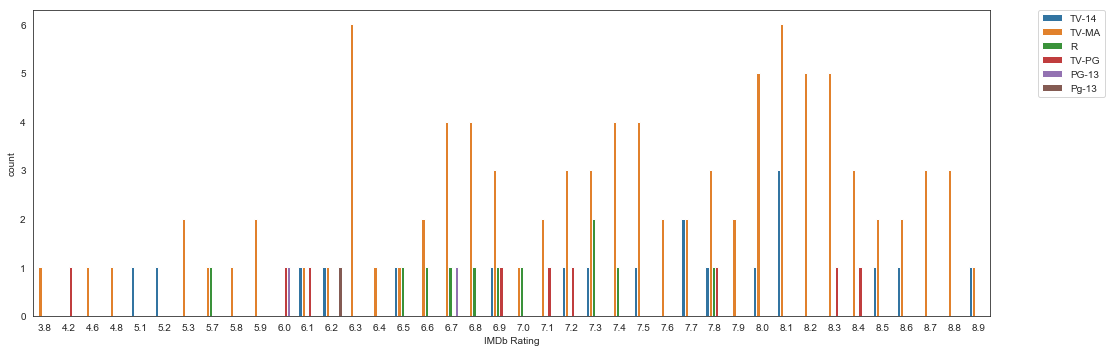

In [33]:
plt.figure(figsize=(14, 5))
sns.countplot(data=netflix, x='IMDb Rating', hue='Rating')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #relocate the legend

The plot above shows us that the content with a rating of 'TV-MA' is the type of content that garners the highest IMDb score. This may be because the majority of the entries in the dataset have a rating of TV-MA, but it shows us that these are the types of content that Netflix produces the most. 

This makes sense because it tells me that Netflix has probably done research and determined TV-MA rated content is the most popular and has the potential to achieve the highest ratings.

## Distribution of Ratings 

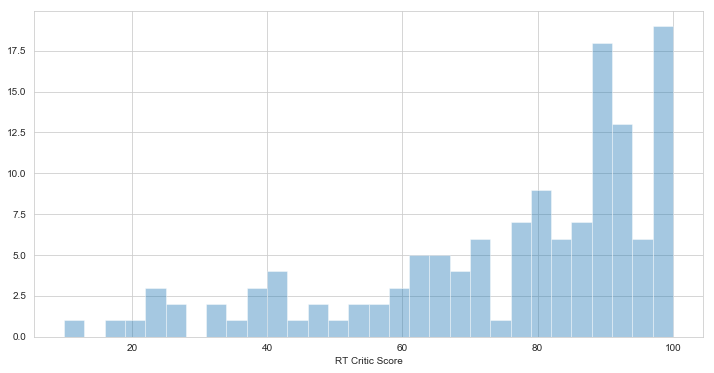

In [25]:
plt.figure(figsize=(12, 6))
sns.distplot(netflix['RT Critic Score'], bins=30, kde=False)
sns.set_style('white')

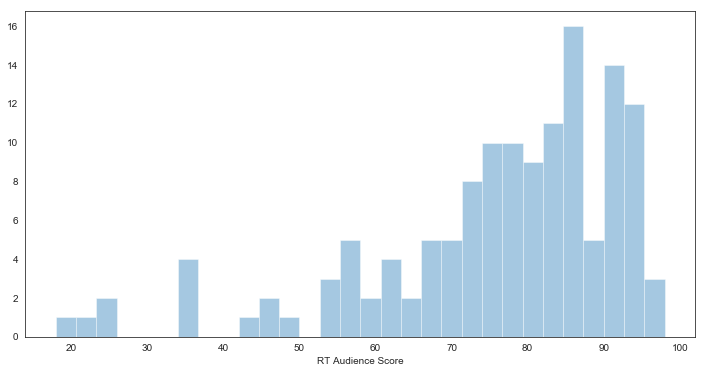

In [26]:
plt.figure(figsize=(12, 6))
sns.distplot(netflix['RT Audience Score'], bins=30, kde=False)
sns.set_style('white')

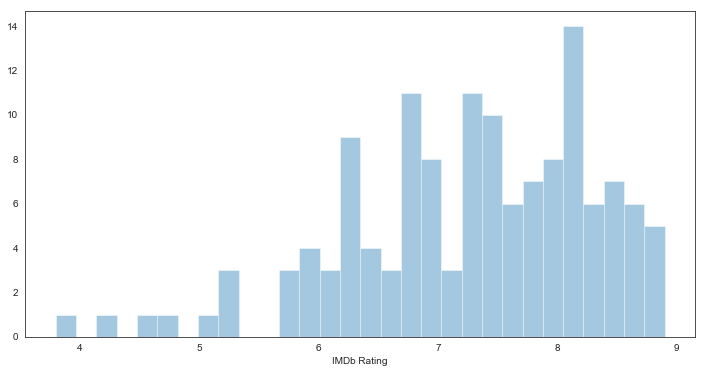

In [27]:
plt.figure(figsize=(12, 6))
sns.distplot(netflix['IMDb Rating'], bins=30, kde=False)
sns.set_style('white')

The distribtion plots above show us that, on average, most Netflix productions recieve a rating of 70% or higher.